### 07. 다층 퍼셉트론으로 손글씨 분류하기
- **다층 퍼셉트론을 구현**하고, 딥러닝을 통해서 숫자 필기 데이터를 분류한다.
- MNIST 데이터랑 다른 데이터이다. 

#### 1. 숫자 필기 데이터 소개

- 사이킷런 패키지에서 제공하는 분류용 예제 데이터
- 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있다. 
- 각 이미지는 0부터 15까지의 명암으로 갖는 8x8 픽셀 해상도의 흑백 이미지
- 해당 이미지가 1797개가 있다. 

[코드 설명]
- %matplotlib inline
    - 주피터 노트북에서 파이썬 코드를 실행할 때 %matplotlib inline를 써야할 때가 있다. 
    - 주피터 노트북을 실행한 브라우저에서 바로 그림을 볼 수 있게끔 만드는 것
    - 즉, 브라우저 내부(inline)에 바로 그려지도록 해주는 코드

(1) load_digits()를 통해 이미지 데이터를 로드하고, 로드한 전체 데이터를 digits에 저장한다. 

In [3]:
%matplotlib inline
# 시각화를 위한 맷플롯립
import matplotlib.pyplot as plt
# 데이터 불러오기
from sklearn.datasets import load_digits
# 총 1979개의 이미지 데이터 로드하고 변수에 저장
digits = load_digits()

(2) 첫번째 샘플 출력
- .images[인덱스]를 사용하면 해당 인덱스의 이미지를 행렬로서 출력할 수 있다. 

In [14]:
# 궁금해서 
print(digits.data)
print(digits.data.shape)
print(digits.images)
print(digits.images.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0

In [16]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [17]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


- 첫번째 샘플이 8x8 행렬로 출력된다.
- 0을 흰색 도화지, 0보다 큰 숫자들을 검은색 점이라고 상상해보면 숫자 0의 실루엣처럼 보인다.
- 실제로 레이블도 숫자 0인지 첫번째 샘플의 레이블을 확인해보기

In [18]:
print(digits.target[0])

0


(3) 위와 같은 샘플이 몇 개 있는지 확인

[코드 설명]
- .format
    - 문자열 포매팅
        - 문자열을 이쁘게 만드는 방법
        - 문자열 중간 중간에 특정 변수의 값을 넣어주기 위해서 사용하는 것
    - 함수 사용법
        - 직접 대입, 변수로 대입, 이름으로 대입
        - format 문자열의 중괄호의 인덱스 사용

In [23]:
# 중괄호 안에 0을 넣어줘도 무방하다. 
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


(4) 전체 샘플 1797개 중에서 상위 5개의 샘플만 시각화 

[코드 설명]
- zip
    - 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수
    - 리스트, 딕셔너리 등으로 만들 수 있다. 
- enumerate
    - 반복문 사용 시 몇 번째 반복문인지 확인이 필요할 수 있다. 
    - 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환한다. 
- subplot
    - matplotlib.pyplot 모듈의 subplot()라는 함수 존재
    - **여러 개의 그래프를 하나의 그림**에 나타내도록 합니다.
- imshwow
    - cmap : map의 색깔 지정
    - interpolation : 보간법이란 뜻으로 이것을 이용하여 결측값을 구하는게 가장 합리적인 방법

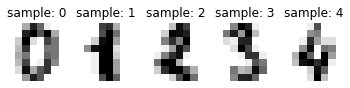

In [59]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]) :
    plt.subplot(2, 5, index+1)
    plt.axis('off') #그림이랑 제목만 나오게
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [40]:
images_and_labels[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

(5) 상위 5개 샘플의 레이블 확인

In [60]:
for i in range(5) : 
    print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


(6) 훈련 데이터와 레이블을 각각 X, Y에 저장
- digits.images는 모든 샘플을 8x8 행렬로 저장하고 있다. 
- 더 나은 방법은 digits.data를 사용하는 것이다. 
- 이는 8x8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태이다. 
- digits.data를 이용해서 첫번째 샘플을 출력해보기

In [61]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


(7) 이를 X로 저장하고, 레이블을 Y에 저장

In [62]:
# 이미지(즉, 특성 행렬)
X = digits.data
# 각 이미지에 대한 레이블
Y = digits.target

----------------------------------------------------------------------------------------------------------

#### 2. 다층 퍼셉트론 분류기 만들기 

In [65]:
import torch
import torch.nn as nn
from torch import optim

In [66]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [67]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [68]:
# 이 비용함수는 소프트맥스 함수를 포함하고 있다. 
loss_fn = nn.CrossEntropyLoss()

In [69]:
optimizer = optim.Adam(model.parameters())

In [70]:
losses = []

In [71]:
for epoch in range(100) : 
    optimizer.zero_grad()
    # forward 연산
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0 :
        print('Epoch {:4d}/{} Cost : {:.6f}'.format(epoch, 100, loss.item()))
        
    losses.append(loss.item())
              

Epoch    0/100 Cost : 2.541957
Epoch   10/100 Cost : 2.131950
Epoch   20/100 Cost : 1.901542
Epoch   30/100 Cost : 1.688262
Epoch   40/100 Cost : 1.478268
Epoch   50/100 Cost : 1.265791
Epoch   60/100 Cost : 1.044096
Epoch   70/100 Cost : 0.841271
Epoch   80/100 Cost : 0.665232
Epoch   90/100 Cost : 0.515241


In [75]:
losses

[2.541957378387451,
 2.476269006729126,
 2.41935658454895,
 2.3687009811401367,
 2.3227596282958984,
 2.2815968990325928,
 2.2449424266815186,
 2.2127304077148438,
 2.1840288639068604,
 2.157437801361084,
 2.1319503784179688,
 2.107567310333252,
 2.0838048458099365,
 2.0606696605682373,
 2.0384888648986816,
 2.0165534019470215,
 1.9943225383758545,
 1.9715944528579712,
 1.9483171701431274,
 1.9248031377792358,
 1.90154230594635,
 1.8789385557174683,
 1.857217788696289,
 1.8360182046890259,
 1.8149528503417969,
 1.7938083410263062,
 1.7724858522415161,
 1.7511334419250488,
 1.7300283908843994,
 1.7090823650360107,
 1.68826162815094,
 1.667484998703003,
 1.6465997695922852,
 1.6255919933319092,
 1.6043914556503296,
 1.5831942558288574,
 1.562085747718811,
 1.541006088256836,
 1.5199902057647705,
 1.4990876913070679,
 1.4782683849334717,
 1.4573739767074585,
 1.4364166259765625,
 1.4154231548309326,
 1.3944278955459595,
 1.3733752965927124,
 1.3522084951400757,
 1.3309004306793213,
 1.309

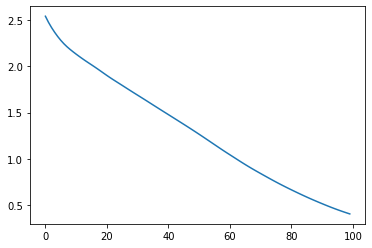

In [72]:
plt.plot(losses)